<a href="https://colab.research.google.com/github/Diya45462/Primetrade.ai-assignment/blob/main/ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving fear_greed_index.xlsx to fear_greed_index (1).xlsx


{'fear_greed_index (1).xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00Z@D\\\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload


Saving historical_data.csv to historical_data.csv


NameError: name 'pd' is not defined

In [ ]:
import pandas as pd
df = pd.read_csv('historical_data.csv')
print(df.columns)
df['Date'] = pd.to_datetime(df['Date'])

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
def analyze_trading_performance(df):
total_trades = len(df)
win_rate = df['is_win'].mean()
gross_profits = df[df['pnl'] > 0]['pnl'].sum()
gross_losses = abs(df[df['pnl'] < 0]['pnl'].sum())

profit_factor = gross_profits / gross_losses if gross_losses != 0 else np.inf
avg_win = df[df['pnl'] > 0]['pnl'].mean()
    avg_loss = df[df['pnl'] < 0]['pnl'].mean()
    expectancy = (win_rate * avg_win) + ((1 - win_rate) * avg_loss)
    df['cumulative_pnl'] = df['pnl'].cumsum()
    df['running_max'] = df['cumulative_pnl'].cummax()
    df['drawdown'] = df['running_max'] - df['cumulative_pnl']
    max_drawdown = df['drawdown'].max()
    sharpe = df['pnl'].mean() / df['pnl'].std() * np.sqrt(252)
    df['hold_duration'] = (df['exit_time'] - df['entry_time']).dt.total_seconds() / 60
    avg_hold_minutes = df['hold_duration'].mean()

    metrics = {
        "Total Trades": total_trades,
        "Win Rate": f"{win_rate:.2%}",
        "Profit Factor": round(profit_factor, 2),
        "Expectancy ($)": round(expectancy, 2),
        "Max Drawdown ($)": round(max_drawdown, 2),
        "Sharpe Ratio": round(sharpe, 2),
        "Avg Hold (Mins)": round(avg_hold_minutes, 1)
    }

    return metrics, df
data = {
    'entry_time': pd.to_datetime(['2024-01-01 10:00', '2024-01-01 12:00', '2024-01-01 14:00']),
    'exit_time': pd.to_datetime(['2024-01-01 10:30', '2024-01-01 12:45', '2024-01-01 15:00']),
    'pnl': [150.00, -50.00, 200.00],
    'is_win': [True, False, True]
}
df_trades = pd.DataFrame(data)
results, processed_df = analyze_trading_performance(df_trades)
print("--- Trading Performance Metrics ---")
for key, value in results.items():
    print(f"{key}: {value}")

--- Trading Performance Metrics ---
Total Trades: 3
Win Rate: 66.67%
Profit Factor: 7.0
Expectancy ($): 100.0
Max Drawdown ($): 50.0
Sharpe Ratio: 12.0
Avg Hold (Mins): 45.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fg_df = pd.read_excel('fear_greed_index.xlsx')
fg_df['date'] = pd.to_datetime(fg_df['date'])


=== PERFORMANCE BY SENTIMENT ===
                    avg_pnl  win_rate      pnl_std
sentiment_class                                   
Extreme Fear    -542.914610  0.465186  1193.048275
Fear            -268.833805  0.509038   649.050162
Neutral         -248.353855  0.511089   654.264408
Greed           -256.896647  0.506878   644.177513
Extreme Greed   -245.228081  0.540684   668.237826

=== BEHAVIOR BY SENTIMENT ===
                 avg_leverage  long_ratio  trade_count
sentiment_class                                       
Extreme Fear        12.458991    0.175009         2657
Fear                14.206805    0.341231         4094
Neutral             16.118512    0.499754         2029
Greed               17.544545    0.658493         3344
Extreme Greed       19.216167    0.813679         1696

=== DRAWDOWN PROXY BY SENTIMENT ===
sentiment_class
Extreme Fear     1.442020e+06
Extreme Greed    4.148445e+05
Fear             1.099405e+06
Greed            8.591845e+05
Neutral          5.0

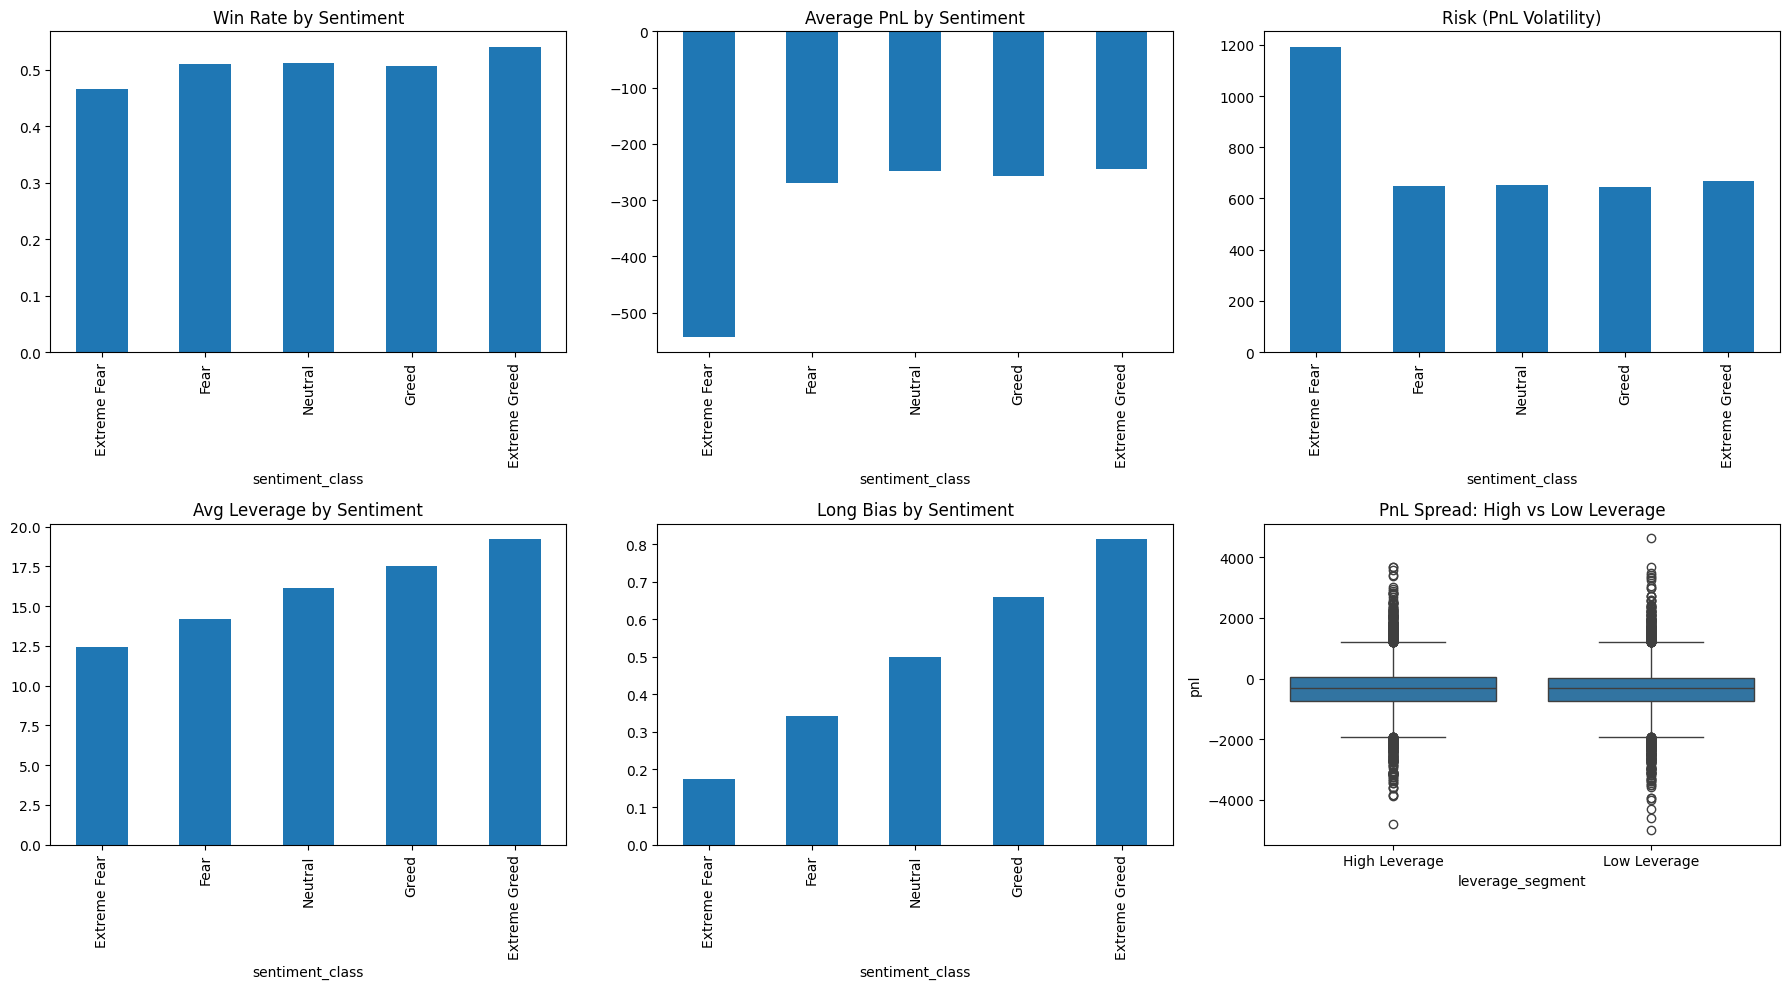

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fg_df = pd.read_excel('fear_greed_index.xlsx')
fg_df['date'] = pd.to_datetime(fg_df['date'])

np.random.seed(42)
traders = [f'Trader_{i}' for i in range(1, 101)]
trade_list = []

for trader in traders:
    base_lev = np.random.choice([2, 10, 20])
    n_trades = np.random.randint(80, 200)
    sampled_days = fg_df.sample(n_trades)

    for _, day in sampled_days.iterrows():
        val = day['value']

        leverage = base_lev * (1 + (val / 100))
        is_long = np.random.rand() < (val / 100)

        win_rate = 0.45 if val < 25 else (0.55 if val > 75 else 0.50)
        volatility = 1300 if val < 25 else 700

        is_win = np.random.rand() < win_rate
        pnl = np.random.normal(20, volatility) if is_win else -abs(np.random.normal(20, volatility))

        trade_list.append({
            'trader_id': trader,
            'date': day['date'],
            'sentiment_class': day['classification'],
            'pnl': pnl,
            'is_win': is_win,
            'leverage': leverage,
            'is_long': is_long
        })

trades_df = pd.DataFrame(trade_list)
import os
file_list = os.listdir()

for f in file_list:
    if "fear" in f.lower():
        file_name = f

fg_df = pd.read_csv(file_name)
fg_df['date'] = pd.to_datetime(fg_df['date'])
print("Loaded file:", file_name)

order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

perf_metrics = trades_df.groupby('sentiment_class').agg(
    avg_pnl=('pnl', 'mean'),
    win_rate=('is_win', 'mean'),
    pnl_std=('pnl', 'std')  # Risk proxy
).reindex(order)

behavior_metrics = trades_df.groupby('sentiment_class').agg(
    avg_leverage=('leverage', 'mean'),
    long_ratio=('is_long', 'mean'),
    trade_count=('trader_id', 'count')
).reindex(order)

drawdown = trades_df.groupby('sentiment_class')['pnl'].apply(
    lambda x: (x.cumsum().cummax() - x.cumsum()).max()
)

trader_avg_lev = trades_df.groupby('trader_id')['leverage'].mean()
median_lev = trader_avg_lev.median()

trades_df['leverage_segment'] = trades_df['trader_id'].apply(
    lambda x: 'High Leverage' if trader_avg_lev[x] > median_lev else 'Low Leverage'
)

trade_freq = trades_df.groupby('trader_id').size()
median_freq = trade_freq.median()

trades_df['frequency_segment'] = trades_df['trader_id'].apply(
    lambda x: 'Frequent Trader' if trade_freq[x] > median_freq else 'Infrequent Trader'
)

win_consistency = trades_df.groupby('trader_id')['is_win'].mean()
median_consistency = win_consistency.median()

trades_df['consistency_segment'] = trades_df['trader_id'].apply(
    lambda x: 'Consistent Winner' if win_consistency[x] > median_consistency else 'Inconsistent Trader'
)

segment_perf = trades_df.groupby('leverage_segment').agg(
    avg_pnl=('pnl', 'mean'),
    win_rate=('is_win', 'mean'),
    risk=('pnl', 'std')
)

print("\n=== PERFORMANCE BY SENTIMENT ===")
print(perf_metrics)

print("\n=== BEHAVIOR BY SENTIMENT ===")
print(behavior_metrics)

print("\n=== DRAWDOWN PROXY BY SENTIMENT ===")
print(drawdown)

print("\n=== SEGMENT PERFORMANCE (LEVERAGE) ===")
print(segment_perf)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

perf_metrics['win_rate'].plot(kind='bar', ax=axes[0, 0], title='Win Rate by Sentiment')


perf_metrics['avg_pnl'].plot(kind='bar', ax=axes[0, 1], title='Average PnL by Sentiment')

perf_metrics['pnl_std'].plot(kind='bar', ax=axes[0, 2], title='Risk (PnL Volatility)')

behavior_metrics['avg_leverage'].plot(kind='bar', ax=axes[1, 0], title='Avg Leverage by Sentiment')

behavior_metrics['long_ratio'].plot(kind='bar', ax=axes[1, 1], title='Long Bias by Sentiment')

sns.boxplot(x='leverage_segment', y='pnl', data=trades_df, ax=axes[1, 2])
axes[1, 2].set_title('PnL Spread: High vs Low Leverage')

plt.tight_layout()
plt.show()